---
#  Graph representations in Python

######  By :  Aurora Clark, Jackson Elowitt, Leonardo Leite, Swarup Banerjee
---

#### Usefull Libraries:
Networkx: can build graphs, show connections, matrix representation, wiener index calculation
iGraph:  can build graph, show connections, matrix representation
Pysmiles: read and create smiles, can convert a SMILES directly to a networkx format
RDkit: can draw molecules and show molecular properties, some of them are topological indices


In [53]:
#installing package
import sys
!{sys.executable} -m pip install  networkx   #comment this lines if don't need to install the packages
!{sys.executable} -m pip install pysmiles
!{sys.executable} -m pip install rdkit

import networkx as nx
import pysmiles as ps
from rdkit import Chem

### Example 1) Molecular  graph and topological descriptors

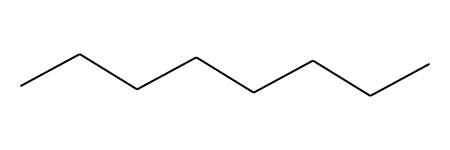

In [54]:
#plot a molecule using rdkit
moleculeSmiles = 'CCCCCCCC'

m = Chem.MolFromSmiles(moleculeSmiles)
m

Adjacency matix
[[0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]


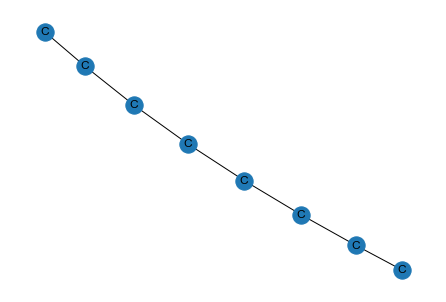

In [56]:
#molecular graph representation using networkx and pysmiles
octane = 'CCCCCCCC'
mol = ps.read_smiles(octane) #this convert the smiles to a graph representation


#plot the graph
import matplotlib.pyplot as plt

elements = nx.get_node_attributes(mol, name = "element")
nx.draw(mol, with_labels=True, labels = elements, pos=nx.spring_layout(mol) )
plt.gca()#.set_aspect('equal')


# adjacency matrix
print('Adjacency matix')
print(nx.to_numpy_matrix(mol))


#### Topological index
calculating by hand the Wiener and Zagreb indices

$$ W(G) =  \frac{1}{2} \sum_{u,v \in V(G)} d(u) d(v)  \quad ,\quad   d(u) = distance $$
$$ Z(G) =  \sum_{u \in V(G)} {d_e}^2(u) \quad  ,  \quad  d_e(u) = degree $$

In [26]:
#define the function for the calculations through NetworkX
def wienerIndex(G):  #G is a networkx graph object
    wiener = 0

    for node1 in G.nodes:
        for node2 in G.nodes:
            wiener += nx.shortest_path_length(G, node1,node2)

    return wiener*0.5

print('Wiener index calculated from my function:',wienerIndex(mol))
print('NetworkX build in function:', nx.wiener_index(mol) )


Wiener index calculated from my function: 84.0
NetworkX build in function: 84.0


In [27]:
def zagrebindex(G):  #G is a networkx graph object
    zagreb = 0

    #iterate through the node, calculates the square of their degree
    for node in G.nodes:
        zagreb = zagreb + (G.degree[node]*G.degree[node])
    return zagreb

print('\nZagreb index calculated from my function:',zagrebindex(mol))


Zagreb index calculated from my function: 26


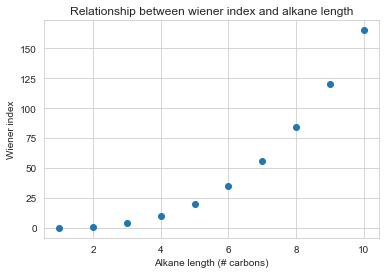

In [49]:
#Calculate Wiener index for some Alkanes

alcanes = ['C', 'CC', 'CCC','CCCC','CCCCC','CCCCCC','CCCCCCC','CCCCCCCC','CCCCCCCCC','CCCCCCCCCC']
wienervalues= []

for alcane in alcanes:
    wienervalues.append(nx.wiener_index(ps.read_smiles(alcane)))

numberOfCarbons = [x.count('C') for x in alcanes]

plt.title('Relationship between wiener index and alkane length')
plt.ylabel('Wiener index')
plt.xlabel('Alkane length (# carbons)')
plt.scatter(numberOfCarbons,wienervalues )
plt.show()